In [2]:
pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 49.2 MB/s eta 0:00:00


# Libraries

In [9]:
# Baseball.ipynb
import pybaseball
from pybaseball import statcast
from pybaseball import statcast_batter
from pybaseball import playerid_lookup
from pybaseball import batting_stats_range # Import this function
from pybaseball import team_batting
from pybaseball import pitching_stats
import pandas as pd
import numpy as np
import statsmodels.api as sm


## Metadata Evaluation

In [4]:
statcast_df = statcast('2023-06-01', '2023-06-01')
statcast_df.columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

This is a large query, it may take a moment to complete


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 1/1 [00:04<00:00,  4.67s/it]


## Player look up

In [5]:
# Find Pete Alonso
player_info = playerid_lookup('Alonso', 'Pete')
print(player_info)

# Get Peta ALonso's player ID using key_mlbam column
alonso_id = player_info['key_mlbam'].values[0]

# Load Statcast data for The player
alonso_data = statcast_batter('2019-04-01', '2024-09-01', alonso_id)

alonso_data.head()

Gathering player lookup table. This may take a moment.
  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0    alonso       pete     624413  alonp001  alonspe01          19251   

   mlb_played_first  mlb_played_last  
0            2019.0           2025.0  
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,ST,2024-09-01,84.0,2.49,6.17,"Alonso, Pete",624413,676979,strikeout,swinging_strike,NaN,NaN,NaN,NaN,13.0,Pete Alonso strikes out swinging.,R,R,L,CWS,NYM,S,2.0,NaN,1,2,2024,-0.94,-0.50,-1.08,1.50,578428.0,NaN,668901.0,0,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,-6.462553,-122.234830,-3.473864,-8.181350,23.829300,-36.745452,3.40,1.56,NaN,NaN,NaN,85.0,2560.0,6.9,746750,642020,657757,672820,678246,676070,667452,673357,666150,53.61,NaN,0.000,0.0,1.0,0.0,0.0,NaN,22,4,Sweeper,0,1,1,0,1,0,1,0,Standard,Standard,307.0,0.057,-0.228,69.6,8.8,NaN,0.228,NaN,-1,1,0.248,0.752,25,29,25,30,2,1,5.0,1.0,6.0,1.0,3.73,-0.94,0.94,40.1,29.260965,-55.936120,38.407388,28.018837,58.347254
1,FF,2024-09-01,98.6,2.65,5.98,"Alonso, Pete",624413,676979,NaN,ball,NaN,NaN,NaN,NaN,11.0,Pete Alonso strikes out swinging.,R,R,L,CWS,NYM,B,NaN,NaN,0,2,2024,0.40,1.26,-1.49,2.55,578428.0,NaN,668901.0,0,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,-12.364806,-142.985417,-6.883989,8.361055,32.637428,-13.388920,3.29,1.43,NaN,NaN,NaN,100.0,2610.0,7.2,746750,642020,657757,672820,678246,676070,667452,673357,666150,53.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,3,4-Seam Fastball,0,1,1,0,1,0,1,0,Standard,Standard,138.0,0.000,-0.003,NaN,NaN,NaN,0.003,NaN,-1,1,0.248,0.752,25,29,25,30,2,1,5.0,1.0,6.0,1.0,1.10,0.40,-0.40,31.8,NaN,NaN,NaN,NaN,NaN
2,CH,2024-09-01,90.4,2.50,5.86,"Alonso, Pete",624413,676979,NaN,swinging_strike_blocked,NaN,NaN,NaN,NaN,14.0,Pete Alonso strikes out swinging.,R,R,L,CWS,NYM,S,NaN,NaN,0,1,2024,1.44,0.79,0.09,0.62,578428.0,NaN,668901.0,0,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,-9.216084,-131.182402,-8.933900,18.496405,26.162298,-21.357355,3.40,1.56,NaN,NaN,NaN,91.8,2234.0,7.2,746750,642020,657757,672820,678246,676070,667452,673357,666150,53.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,2,Changeup,0,1,1,0,1,0,1,0,Standard,Standard,129.0,0.000,-0.066,73.8,8.2,NaN,0.066,NaN,-1,1,0.248,0.752,25,29,25,30,2,1,5.0,1.0,6.0,1.0,2.00,1.44,-1.44,33.9,18.725804,-17.495114,44.793459,39.470935,38.512040
3,FF,2024-09-01,99.0,2.66,6.08,"Alonso, Pete",624413,676979,NaN,foul,NaN,NaN,NaN,NaN,11.0,Pete Alonso strikes out swinging.,R,R,L,CWS,NYM,S,NaN,NaN,0,0,2024,0.65,1.46,-1.16,2.72,578428.0,NaN,668901.0,0,4,Top,NaN,NaN,NaN,NaN,NaN,NaN,-12.084596,-143.549788,-7.227676,11.670763,32.378331,-10.338897,3.40,1.56,215.0,76.9,22.0,100.3,2606.0,7.2,746750,642020,657757,672820,678246,676070,667452,673357,666150,53.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,4-Seam Fastball,0,1,1,0,1,0,1,0,Standard,Standard,

### Get Data for Every Pitch

In [6]:
pitch_data = statcast(start_dt='2019-03-28', end_dt='2019-03-30')
df = pd.DataFrame(pitch_data)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(pitch_data.head())

This is a large query, it may take a moment to complete


  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 33%|███▎      | 1/3 [00:04<00:08,  4.40s/it]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 67%|██████▋   | 2/3 [00:07<00:03,  3.57s/it]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime

     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
3202         SI 2019-03-30           98.1           3.12           5.13   
3361         SI 2019-03-30           97.1           3.25            5.0   
3479         SI 2019-03-30           97.5           3.27           5.17   
3557         SI 2019-03-30           96.9           3.28           5.25   
3727         SI 2019-03-30           96.6           3.18           5.13   

      player_name  batter  pitcher     events      description  spin_dir  \
3202  Hader, Josh  622168   623352  strikeout  swinging_strike      <NA>   
3361  Hader, Josh  622168   623352        NaN  swinging_strike      <NA>   
3479  Hader, Josh  622168   623352        NaN    called_strike      <NA>   
3557  Hader, Josh  451594   623352  strikeout  swinging_strike      <NA>   
3727  Hader, Josh  451594   623352        NaN  swinging_strike      <NA>   

      spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
3202         

### Get Data for every at bat

from pybaseball import statcast_batter

In [7]:
import pandas as pd
from pybaseball import statcast_batter

# Get pitch data for a specific player
batter_data = statcast_batter(start_dt='2019-03-28', end_dt='2019-03-30', player_id=624413)

# Aggregate to at-bats
at_bat_data = batter_data.groupby(['game_pk', 'batter', 'at_bat_number']).agg({
    'pitch_type': 'first',  # Example: take the first pitch type
    'launch_speed': 'mean',  # Average launch speed for the at-bat
    'launch_angle': 'mean',  # Average launch angle for the at-bat
    'events': 'first'  # Use 'events' for outcome, and take the first event in the at-bat
}).reset_index()

print(at_bat_data.head())

Gathering Player Data
   game_pk  batter  at_bat_number pitch_type  launch_speed  launch_angle  \
0   565895  624413              2         FC         80.80          20.0   
1   565895  624413             19         CH         73.15          13.0   
2   565895  624413             39         FF           NaN           NaN   
3   565895  624413             55         FF         78.70          51.5   
4   565896  624413              2         SI         76.10          24.0   

      events  
0  strikeout  
1  field_out  
2  strikeout  
3     single  
4     single  


# Team Stats EDA

In [10]:
team_stats = team_batting(2022)
team_stats.head()

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,22,2022,LAD,29,2326,5526,6247,1418,850,325,31,212,847,812,607,22,1374,56,53,3,85,98,18,0.257,1551,1730,913,122,25138,9413,15725,120,14,5,0.097,0.220,0.44,0.333,0.442,0.775,0.185,0.302,0.90,0.218,0.370,0.412,0.071,0.123,0.077,0.357,0.337,133.4,848,138.8,13.5,186.3,-19.2,356.8,37.5,$299.7,5.0,119,14.09,-98.94,113.03,151.44,16.20,0.94,1.37,83,13.08,1.83,0.492,93.6,0.219,84.8,0.063,89.2,0.099,80.0,0.113,85.9,0.013,87.3,0.001,62.8,0.003,NaN,84.7,6.9,21.8,3.0,29.3,4.2,-1.1,0.69,0.12,1.37,0.12,1.03,1.31,-6.10,0.294,0.702,0.464,0.640,0.843,0.768,0.417,0.611,0.108,9.0,0.312,NaN,0.071,0.020,NaN,0.177,0.209,0.077,0.026,0.001,0.107,NaN,NaN,NaN,94.0,NaN,89.5,87.9,NaN,93.1,84.7,79.2,81.7,48.6,85.7,NaN,NaN,-2.1,NaN,0.3,-6.2,NaN,-4.1,1.3,2.2,1.9,-3.6,-2.8,NaN,NaN,9.2,NaN,5.1,2.8,NaN,4.6,1.1,-4.9,-4.5,7.2,3.5,NaN,NaN,36.6,NaN,22.9,5.0,NaN,42.6,-5.9,5.7,1.7,-1.3,24.0,NaN,NaN,0.47,NaN,1.28,1.01,NaN,0.96,-0.11,0.30,0.26,-4.43,0.89,NaN,NaN,0.254,0.666,0.464,0.574,0.838,0.767,0.510,23.1,-5.7,6.3,3.2,22 - 37,147.8,28.5,10.4,0.430,0.334,0.236,0.135,0.522,0.342,0.351,0.107,0.000,0.094,0.309,0.070,0.020,NaN,NaN,0.179,0.221,0.000,85.4,71.2,79.7,94.1,89.5,87.7,NaN,NaN,93.1,84.6,81.7,-2.5,7.0,2.4,-1.9,0.6,-5.7,NaN,NaN,-3.5,1.8,-1.0,2.5,-10.2,-6.2,8.4,4.4,1.9,NaN,NaN,3.9,0.2,1.2,21.6,0.0,6.9,32.6,29.2,8.8,NaN,NaN,44.3,-14.5,0.0,0.80,-0.01,0.29,0.42,1.66,1.76,NaN,NaN,0.98,-0.26,0.79,0.258,0.664,0.464,0.579,0.838,0.767,0.507,23.1,3.8,106,116,97,106,111,119,104,1.08,86,112,104,106,96,96,80,99,113,89.5,15.8,389,0.092,112.5,1760,0.418,4210,0.161,0.268,NaN,NaN,NaN,39.0
1,14,2022,TOR,28,2445,5555,6158,14

# Univariate Linear Regression

In [11]:
X = sm.add_constant(team_stats['OBP']) # See how On base percentage predicts runs scored
y = team_stats['R']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.98e-11
Time:                        19:59:51   Log-Likelihood:                -145.85
No. Observations:                  30   AIC:                             295.7
Df Residuals:                      28   BIC:                             298.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -879.3325    146.708     -5.994      0.0

# New Stat - Bases per plate appearence BPA

In [30]:
# Make a variable called plate appearences (PA)
team_stats['PA'] = (
    team_stats['AB'] +
    team_stats['BB'] +
    team_stats['HBP'] +
    team_stats['SF'] +
    team_stats['SH']
)
# Make a variable for total bases (TB)
team_stats['TB'] = (
    team_stats['BB'] * 1 +
    team_stats['HBP'] * 1 +
    team_stats['1B'] * 1 +
    team_stats['2B'] * 2 +
    team_stats['3B'] * 3 +
    team_stats['HR'] * 4
)

# Make a variable called bases per plate appearance (BPA)
team_stats['BPA'] = team_stats['TB'] / team_stats['PA']

In [31]:
predictors = ['OBP', 'SLG', 'AVG', 'OPS', 'HR', 'BB', 'SO', 'SB', 'BPA']
results = []
for var in predictors:
  X = sm.add_constant(team_stats[var])
  y = team_stats['R']
  model = sm.OLS(y, X).fit()
  results.append({
      'variable': var,
      'r_squared': model.rsquared,
      'p_value': model.pvalues[var],
      'coef': model.params[var]
  })

summary_df = pd.DataFrame(results)
summary_df.sort_values(by='r_squared', ascending=False)

,variable,r_squared,p_value,coef
3,OPS,0.908796,4.305026e-16,1865.218412
8,BPA,0.894871,3.169812e-15,2603.773891
1,SLG,0.869789,6.422603e-14,2654.406722
0,OBP,0.804444,1.977273e-11,5054.291682
4,HR,0.554427,2.379274e-06,1.535648
2,AVG,0.456197,4.218904e-05,4067.207052
5,BB,0.411782,1.324083e-04,0.751286
6,SO,0.056594,2.055458e-01,-0.167829
7,SB,0.004587,7.221388e-01,0.198034


# Multivariate Linear Regression

In [18]:
predictors = ['OPS', 'HR', 'BB', 'SO', 'SB']

X = team_stats[predictors]
X = sm.add_constant(X) # Add interecept term
y = team_stats['R']
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     58.23
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.24e-12
Time:                        20:22:30   Log-Likelihood:                -131.70
No. Observations:                  30   AIC:                             275.4
Df Residuals:                      24   BIC:                             283.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -590.9252    186.690     -3.165      0.0

# Single Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [57]:
features = ['OBP', 'SLG', 'OPS', 'HR', 'SO', 'SB', 'BPA']
X = team_stats[features]
y = team_stats['R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree.feature_importances_
print("Train Score:", tree.score(X_train, y_train))
print("Test Score:", tree.score(X_test, y_test))

Train Score: 0.9803962632614303
Test Score: 0.8202566103986422


# XG Boost

In [58]:
pip install xgboost

Train Score: 0.999923050403595
Test Score: 0.6887965202331543


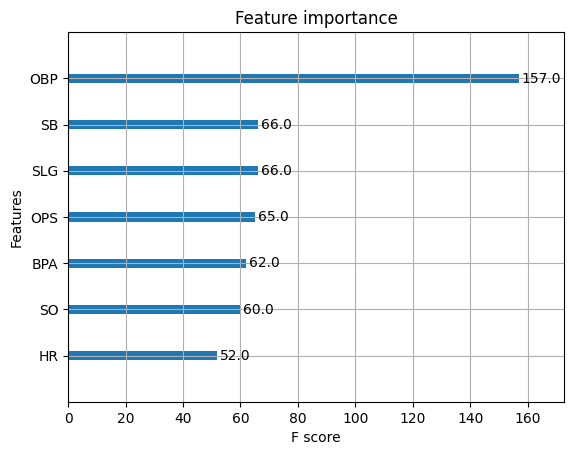

In [60]:
from xgboost import XGBRegressor

# Your features
features = ['OBP', 'SLG', 'OPS', 'HR', 'SO', 'SB', 'BPA']
X = team_stats[features]
y = team_stats['R']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
print("Train Score:", xgb_model.score(X_train, y_train))
print("Test Score:", xgb_model.score(X_test, y_test))

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()
